## Hello image classification
Follows the basic tensorflow demonstration of image classification

In [6]:
COMPUTE_DEVICE = "cpu"  # "cpu"/"gpu"
ARCHIVE_LOGS = False
LOG_DIR = "logs/fit/"
EPOCHS = 10
GENS = 3000
BATCHES = 5

## Setup

In [7]:
import datetime
import os
import random
import itertools
from matplotlib import pyplot as plt

## setup tensorflow

if COMPUTE_DEVICE == "cpu":
	os.environ['CUDA_VISIBLE_DEVICES'] = '-1'
if ARCHIVE_LOGS:
	LOG_DIR += datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

import tensorflow as tf
import keras

%load_ext tensorboard

## monitoring

TENSORBOARD_CALLBACK = tf.keras.callbacks.TensorBoard(log_dir=LOG_DIR, histogram_freq=1)
callbacks = []

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


## Data & Model

In [8]:
dataset = tf.keras.datasets.fashion_mnist.load_data()

(train_images, train_labels), (test_images, test_labels) = dataset

train_images = train_images / 255.0

test_images = test_images / 255.0

def create_model():
	return tf.keras.models.Sequential([
		tf.keras.layers.Flatten(input_shape=(28,28)),
		tf.keras.layers.Dense(128, activation='relu'),
		tf.keras.layers.Dense(10)
	], name = "guess")

## Processing

In [9]:
model = create_model()
loss_func = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer='adam', loss=loss_func, metrics=['accuracy'])

## monitoring
callbacks += [TENSORBOARD_CALLBACK]

## fitting
model.fit(train_images, train_labels, epochs=EPOCHS, callbacks=callbacks)

Epoch 1/10


2022-04-18 20:01:44.063808: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 [==============================] - 7s 4ms/step - loss: 0.4882 - accuracy: 0.8284
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3707 - accuracy: 0.8655
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3342 - accuracy: 0.8777
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3118 - accuracy: 0.8857
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2942 - accuracy: 0.8925
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2800 - accuracy: 0.8958
Epoch 7/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2682 - accuracy: 0.9005
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2577 - accuracy: 0.9051
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2477 - accuracy: 0.9077
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2388 - accurac

## Results

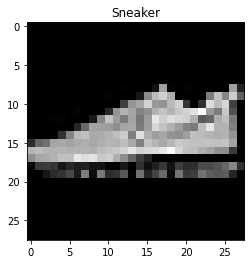

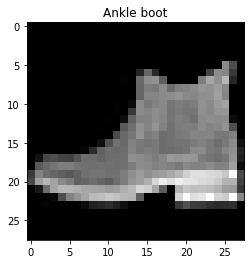

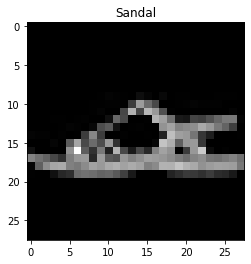

In [11]:
prob_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = model.predict(test_images)


class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
				'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

for i in range(3):
	j = random.randint(0,10000)
	plt.gray()
	plt.imshow(test_images[j])
	best_class = tf.math.argmax(predictions[j])
	plt.title(class_names[best_class])
	plt.show()

# model.summary()
# %tensorboard --logdir="$LOG_DIR"